# **Data science workshop project**
**Team:** Elad, Tsach, Oz, Eva

**Problem:** The predictors of in-hospital mortality for admitted patients remain poorly characterized.

**Goal of the project**: We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


# **Part 1- Data analysis**

**Goal of this part: Understand the data to build a better model of prediction of hospital death**


# Part 1.1 Understand the dataset

link of the dataset: https://www.kaggle.com/datasets/mitishaagarwal/patient
**Main information about the dataset used:**
- 85 features in the original dataset
- not separated in train / test / validation
- problem of classification : hospital death or not based on informtion of patient collected at the time of hospitalization
- each row in the dataset is a patient and value for different features (related to his health state during his hospitalization) 

In [690]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
#import plotly.expess as px -not working in Eva after installing with: pip install plotly

#Machine learning library
import sklearn



In [691]:
## Data Loading

In [692]:
complete_data = pd.read_csv('dataset.csv') #load the dataset

In [693]:
complete_data.head() #beginning of the dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


We can see that there are many features with different type of representations:
    - numerical data
    - categorical data
    - binary data
Also, we can see that there are missing values: not each hospital have the possibility to collect all same data for all patients because of difference reason (urgence, unable to measure,...)

In [694]:
complete_data.shape   #dataset sizes: 85 columns and 91713 rows/patients in the original dataset

(91713, 85)

In [695]:
#column / features and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

Many features are for people which didn t learn medicine non undrstandable, so we will try to understand them in order to clean them better.
We build another document called "Medical information important for the project" which explain these features.



In [696]:
complete_data.describe() #only for numerical data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Scale of features are really differents, so maybe need of normalization.
Some are continuous or binary.

In [697]:
class_prediction = "hospital_death" #label
#binary : 0 (no hospital death = living) or 1 (hospital death), is a column / feature in the dataset

In [698]:
complete_data["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

([<matplotlib.patches.Wedge at 0x1b0930e9130>,
 [Text(-1.0598172020063896, 0.294597179774939, '0'),
  Text(1.0598172295885635, -0.2945970805476902, '1')],
 [Text(-0.5780821101853033, 0.16068937078633036, '91.4%'),
  Text(0.5780821252301255, -0.16068931666237643, '8.6%')])

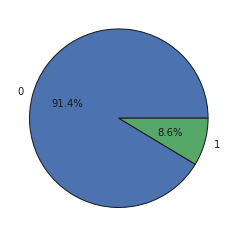

In [699]:
unique_labels = np.unique(complete_data[class_prediction])
plt.pie(np.array([len(complete_data[complete_data[class_prediction]==label]) for label in unique_labels ]), labels = list(unique_labels), autopct='%1.1f%%')

The distribution of the two classes is not balanced at all : it will be challenging because most of the patients in the dataset haven t hospital mortality.

# Part 1.2  Data cleaning, missing values, changes representation and visualization

We have the column number 83 that is empty so we will delete it. 
In addition, we will also remove the feature encounter_id and patient_id becuse theey are unique for each patient and do not have impact on the prediction of the future model we will build.

In [700]:
complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True) #delete feature 83


In [701]:
#partition of features based on original data

# WITH BMI
numerical_features = ["age", "bmi","height", "weight", "elective_surgery", 
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min",
                      "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min",
                      "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min",
                      "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min",
                      "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min",
                      "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min",
                      "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min",
                      "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "d1_glucose_max", "d1_glucose_min",
                      "d1_potassium_max", "d1_potassium_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]

binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "gender", "apache_post_operative",
                   "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression",
                   "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

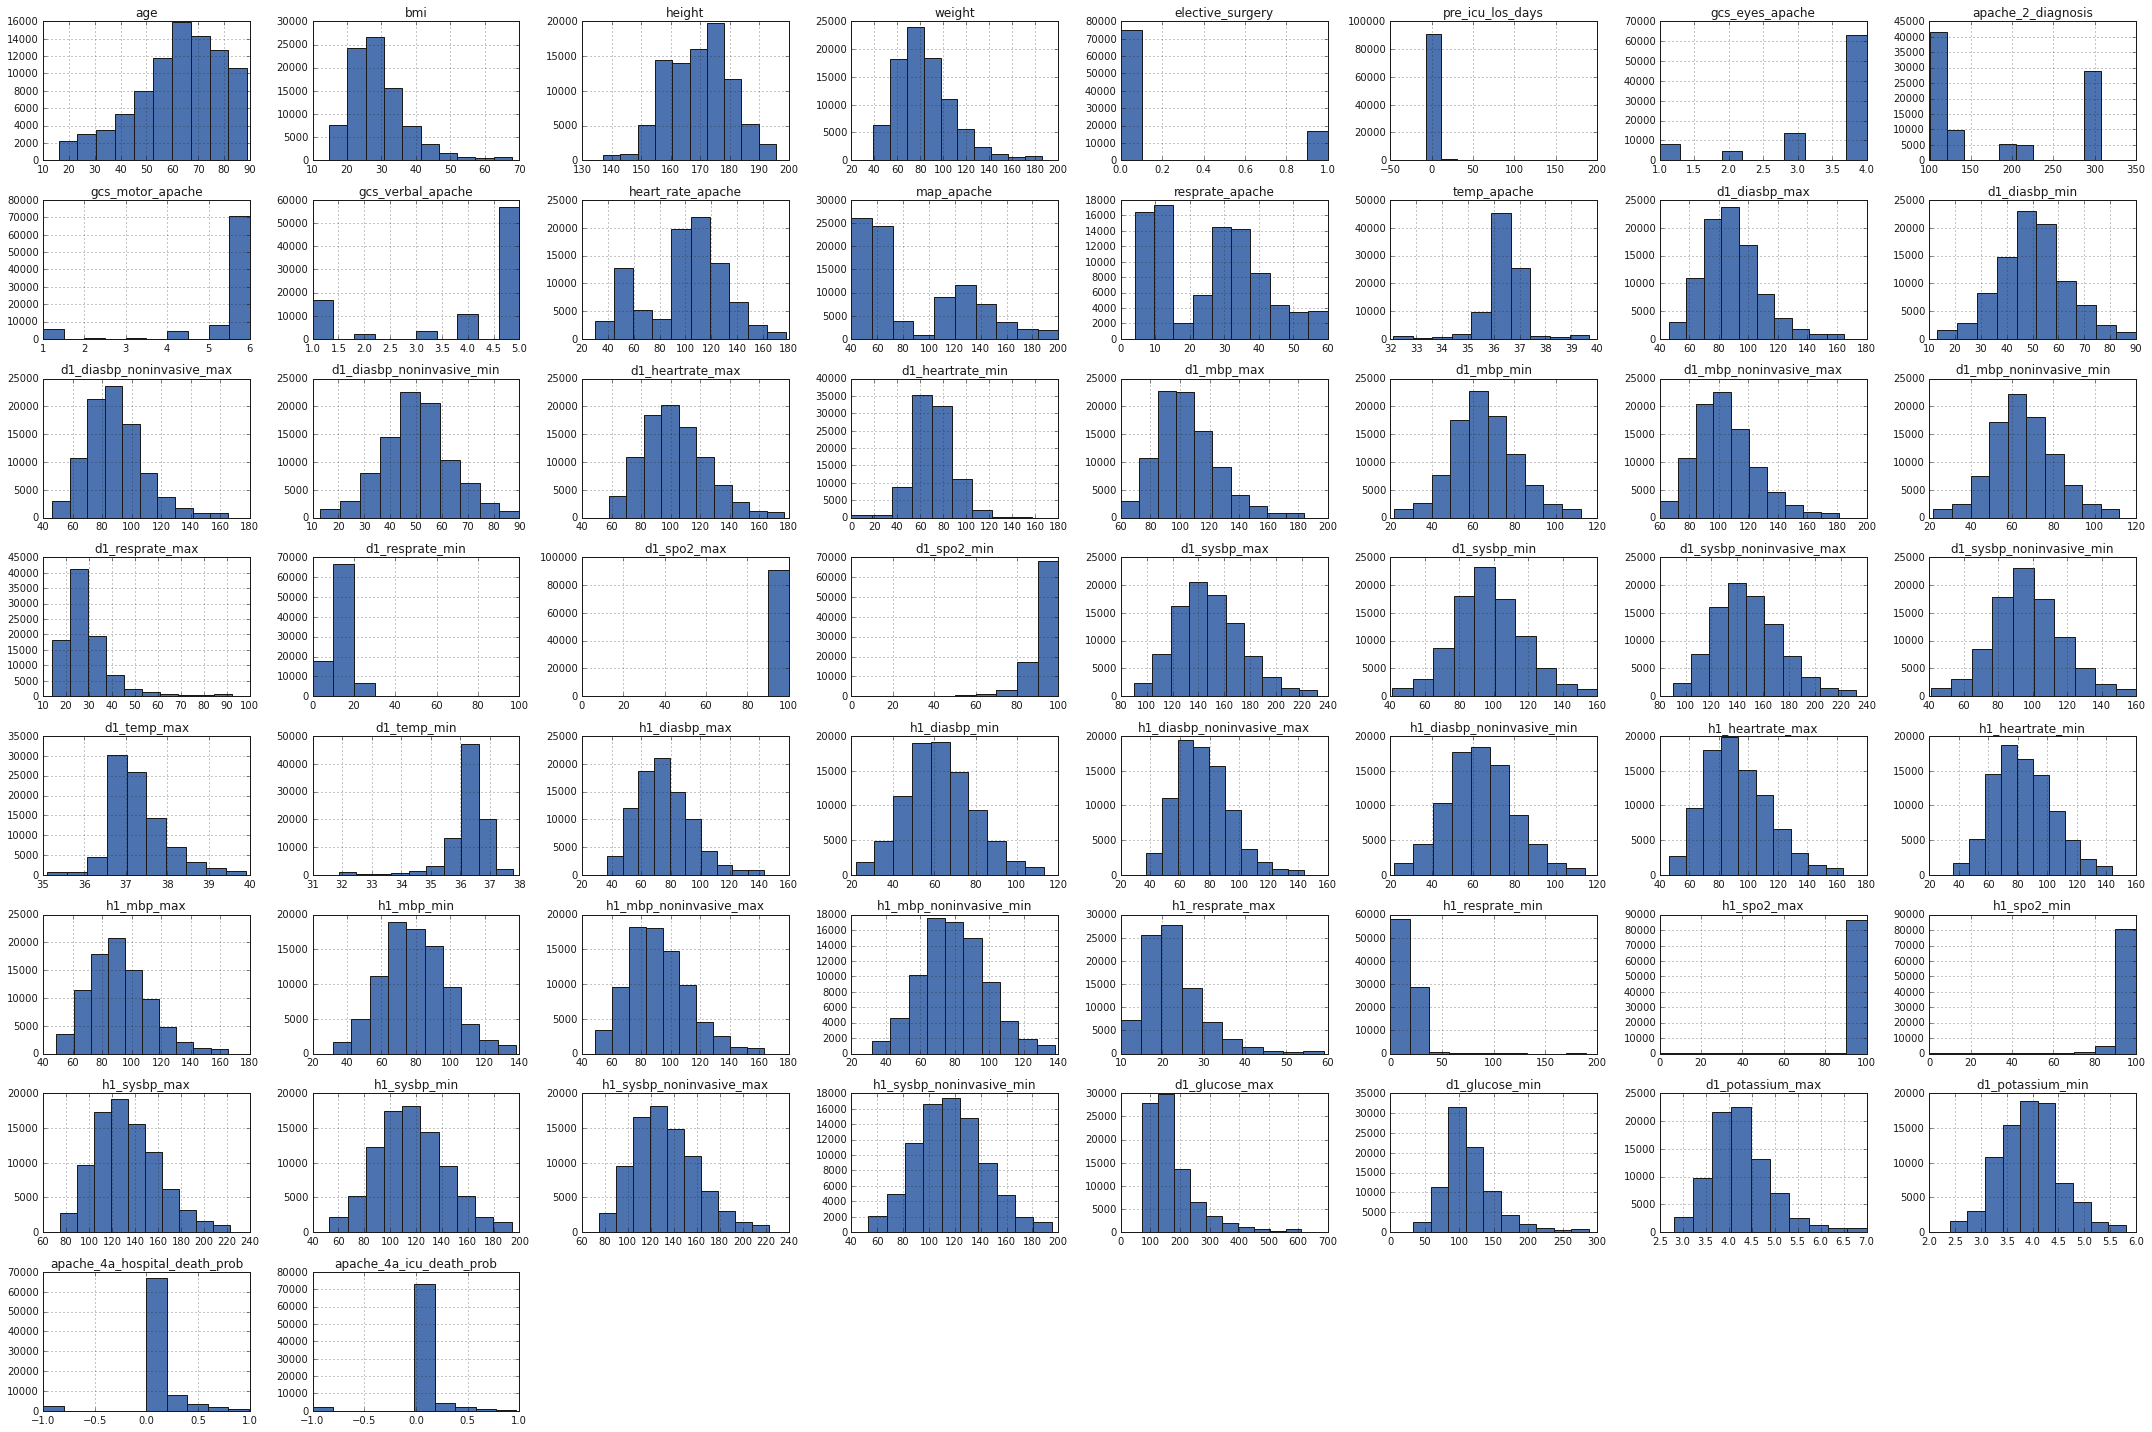

In [702]:
#data distribution - numerical features
complete_data[numerical_features].hist(alpha=1, figsize=(30, 20))
plt.tight_layout()
plt.show()


# Missing values

Let s check number of missing values in each features

In [703]:
pd.set_option('display.max_rows', 100)
complete_data.isnull().sum(axis=0).sort_values(ascending=False)

d1_potassium_max                 9585
d1_potassium_min                 9585
h1_mbp_noninvasive_min           9084
h1_mbp_noninvasive_max           9084
apache_4a_hospital_death_prob    7947
apache_4a_icu_death_prob         7947
h1_diasbp_noninvasive_min        7350
h1_diasbp_noninvasive_max        7350
h1_sysbp_noninvasive_max         7341
h1_sysbp_noninvasive_min         7341
d1_glucose_max                   5807
d1_glucose_min                   5807
h1_mbp_min                       4639
h1_mbp_max                       4639
h1_resprate_min                  4357
h1_resprate_max                  4357
age                              4228
h1_spo2_max                      4185
h1_spo2_min                      4185
temp_apache                      4108
h1_diasbp_min                    3619
h1_diasbp_max                    3619
h1_sysbp_min                     3611
h1_sysbp_max                     3611
bmi                              3429
h1_heartrate_max                 2790
h1_heartrate

We have many missing values so we need to find how to fill them or deal with them.

In [704]:
complete_data.shape[0] - complete_data.dropna().shape[0]

34778

Around third of rows have missing values!
In this project the classification is binary so let s check the repartition of missing values dpeending on the classification.

In [705]:
missing_data = complete_data[complete_data.isnull().any(axis=1)]
missing_data['hospital_death'].value_counts()

0    31754
1     3024
Name: hospital_death, dtype: int64

Most of missing values are in the class 0 (class of no hospital death - living) which we have a lot.
In the case they belongs to the class 1 (hospital death) we will try to fill it or change the representation of the data.
Missing data in class 1 is more critic so we will first try to focus on them.

In [706]:
# dead_rows = complete_data 
# dead_rows.drop(complete_data[complete_data['hospital_death'] == 0].index, inplace = True)
# dead_rows.isnull().sum(axis=0).sort_values(ascending=False)

features_with_missing_values_for_dead = ['d1_potassium_min','d1_potassium_max','age', 
                                    'h1_mbp_noninvasive_min','h1_mbp_noninvasive_max',
                                    'temp_apache','apache_4a_hospital_death_prob',
                                    'h1_diasbp_noninvasive_min', 'h1_diasbp_noninvasive_max',
                                    'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
                                    'd1_glucose_min','d1_glucose_max','h1_spo2_min','h1_spo2_max',
                                    'bmi','h1_mbp_max','h1_mbp_min','h1_resprate_max',
                                    'h1_resprate_min','gcs_motor_apache',
                                    'gcs_verbal_apache','gcs_eyes_apache','d1_temp_max','d1_temp_min',
                                    'h1_diasbp_min','h1_diasbp_max','h1_sysbp_min',
                                    'h1_sysbp_max','weight','h1_heartrate_min','h1_heartrate_max',
                                    'height','apache_3j_bodysystem','apache_2_bodysystem',
                                    'apache_2_diagnosis','d1_mbp_noninvasive_max',
                                    'd1_mbp_noninvasive_min','apache_3j_diagnosis',
                                    'gcs_unable_apache','map_apache','resprate_apache',
                                    'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
                                    'd1_sysbp_noninvasive_min','d1_sysbp_noninvasive_max',
                                    'heart_rate_apache','ethnicity','lymphoma','aids','cirrhosis',
                                    'solid_tumor_with_metastasis'',immunosuppression',
                                    'leukemia','arf_apache','intubated_apache','hepatic_failure',
                                    'ventilated_apache','diabetes_mellitus','d1_spo2_min',
                                    'd1_spo2_max','d1_resprate_max','d1_resprate_min','d1_sysbp_min',
                                    'd1_diasbp_min','d1_diasbp_max','d1_sysbp_max','d1_mbp_min',
                                    'd1_mbp_max','d1_heartrate_min','d1_heartrate_max',
                                    'icu_admit_source','gender']

Let s try to find a way to fill missing values, we will check possible values in the dataset and we will try to find the better way to fill them.

## **The bmi case**
We can see that bmi has many missing values but we can calculate it because it depends on 2 other feature: height and weigh.
BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass.
The formula is weigh / height^2

In [707]:
bmi_set = complete_data[['bmi','weight','height']]
bmi_set[bmi_set.isnull().any(axis=1)].head(20)

,bmi,weight,height
4,NaN,NaN,188.0
7,NaN,NaN,165.0
8,NaN,NaN,170.2
12,NaN,NaN,175.3
13,NaN,NaN,172.7
15,NaN,NaN,160.0
22,NaN,NaN,162.6
28,NaN,NaN,160.0
37,NaN,NaN,151.8
41,NaN,NaN,165.1


We can see that we can t fill bmi by calculating with height and weight because they are also missing
In addition we will separate values in category because numbers are not to much important but different define different type of corpulence which can be easier be understable by the model.

In [708]:
#create a column to know where bmi is missing
complete_data['missing bmi'] = (complete_data['bmi'].isnull()).astype(int)
complete_data['missing bmi']
complete_data['bmi'].fillna(100,inplace=True) #will be remove then
complete_data.head(10) #last feature at extreme right side

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,missing bmi
0,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,0
1,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
2,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,0
3,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,0
4,33,19.0,100.00,0,Caucasian,M,188.0,Accident & Emergency,91,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,1
5,83,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,95,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0,0
6,83,59.0,57.45,0,Caucasian,F,165.1,Accident & Emergency,95,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
7,33,70.0,100.00,0,Caucasian,M,165.0,Accident & Emergency,91,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
8,118,45.0,100.00,0,Caucasian,M,170.2,Other Hospital,114,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1,1
9,118,50.0,25.71,0,NaN,M,175.3,Accident & Emergency,114,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,0


In [709]:
bmi_cat = ['Severe Thinness', 'Moderate Thinness','Mild Thinness','Normal', 
           'Overweight','Obese l1',"Obese l2"," Obese l3","missing bmi 2"]
category_bmi = pd.cut(complete_data['bmi'], bins=[0,16,17,18.5,25,30,35,40,80,100], 
                      labels=bmi_cat)
complete_data.insert(9,'bmi group',category_bmi)
complete_data.drop('bmi', inplace=True, axis=1)
numerical_features.remove("bmi")

In [710]:
complete_data = pd.get_dummies(complete_data,columns=['bmi group'])
complete_data.drop('bmi group_missing bmi 2', inplace=True, axis=1) 

complete_data.head(15) #look at new column bmi group 

,hospital_id,age,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,hospital_death,missing bmi,bmi group_Severe Thinness,bmi group_Moderate Thinness,bmi group_Mild Thinness,bmi group_Normal,bmi group_Overweight,bmi group_Obese l1,bmi group_Obese l2,bmi group_ Obese l3
0,118,68.0,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0,0,0,0,0,1,0,0,0,0
1,81,77.0,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0,0,0,0,0,0,1,0,0,0
2,118,25.0,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,1,0,0
3,118,81.0,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,...,0,0,0,0,0,1,0,0,0,0
4,33,19.0,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,1,0,0,0,0,0,0,0,0
5,83,67.0,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,0,0,0,0,1,0,0,0
6,83,59.0,0,Caucasian,F,165.1,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,0,0,1
7,33,70.0,0,Caucasian,M,165.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,1,0,0,0,0,0,0,0,0
8,118,45.0,0,Caucasian,M,170.2,Other Hospital,114,admit,CCU-CTICU,...,1,1,0,0,0,0,0,0,0,0
9,118,50.0,0,NaN,M,175.3,Accident & Emergency,114,admit,CCU-CTICU,...,0,0,0,0,0,0,1,0,0,0


## **Give meaning to the data: The GCS case** 
This test gives a score that helps to know how much a person is in danger to die: we will try to add the result to the data because it s not given in the original data: we have only score for each component of the test: eyes, motor and verbal.

In [711]:
def generate_gcs_score(row): #sum each component
   return row['gcs_motor_apache']+row['gcs_verbal_apache']+row['gcs_eyes_apache']

In [712]:
gcs_params = ['gcs_motor_apache', 'gcs_verbal_apache', 'gcs_verbal_apache', 'gcs_eyes_apache']
gcs_data = complete_data[gcs_params]
complete_data['gcs_score']=complete_data.apply(generate_gcs_score,axis=1)
complete_data['gcs_score'] 

0        13.0
1         5.0
2        14.0
3        15.0
4         NaN
         ... 
91708    15.0
91709    15.0
91710    13.0
91711    13.0
91712    11.0
Name: gcs_score, Length: 91713, dtype: float64

GCS - Glasgow Coma Scale : clinical scale used to reliably measure a person's level of consciousness after a brain injury. 
The score can be between 3 and 15 and can be separate in category:
- 3-8 severe
- 9-12 moderate
- 13-15 mild

=> Low score is correlated with higher risk of death.

So let s make it like the bmi

In [713]:
gcs_cat = ['Severe', 'Moderate','Mild']
category_gcs = pd.cut(complete_data['gcs_score'], bins=[3,8,12,15], 
                      labels=gcs_cat)
complete_data.insert(3,'gcs group',category_gcs)

In [714]:
complete_data = pd.get_dummies(complete_data,columns=['gcs group'])
gcs_set = complete_data[['gcs_score','gcs group_Moderate','gcs group_Severe', 
                         'gcs group_Mild','gcs_unable_apache']]
gcs_set.head(15)

,gcs_score,gcs group_Moderate,gcs group_Severe,gcs group_Mild,gcs_unable_apache
0,13.0,0,0,1,0.0
1,5.0,0,1,0,0.0
2,14.0,0,0,1,0.0
3,15.0,0,0,1,0.0
4,NaN,0,0,0,NaN
5,15.0,0,0,1,0.0
6,15.0,0,0,1,0.0
7,15.0,0,0,1,0.0
8,15.0,0,0,1,0.0
9,15.0,0,0,1,0.0


Deal with missing value : we will add binary column which will tell when there is a missing values.

In [715]:
features_with_missing_values = complete_data.columns[complete_data.isnull().any()]
for f in features_with_missing_values:
    name = "missing " + f
    if f in numerical_features:
        complete_data[name] = (complete_data[f].isnull()).astype(int)
complete_data.head(10)

,hospital_id,age,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,missing h1_sysbp_max,missing h1_sysbp_min,missing h1_sysbp_noninvasive_max,missing h1_sysbp_noninvasive_min,missing d1_glucose_max,missing d1_glucose_min,missing d1_potassium_max,missing d1_potassium_min,missing apache_4a_hospital_death_prob,missing apache_4a_icu_death_prob
0,118,68.0,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0,0,0,0,0,0,0,0,0,0
1,81,77.0,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,0,0,0
2,118,25.0,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,...,0,0,0,0,1,1,1,1,0,0
3,118,81.0,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,...,0,0,1,1,0,0,0,0,0,0
4,33,19.0,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,0,0,0,1,1,1,1,1,1
5,83,67.0,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,0,0,0
6,83,59.0,0,Caucasian,F,165.1,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,1,1,0,0,0,0,0,0
7,33,70.0,0,Caucasian,M,165.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,0,0,0
8,118,45.0,0,Caucasian,M,170.2,Other Hospital,114,admit,CCU-CTICU,...,0,0,0,0,0,0,0,0,1,1
9,118,50.0,0,NaN,M,175.3,Accident & Emergency,114,admit,CCU-CTICU,...,0,0,0,0,0,0,0,0,0,0


# Encode categorical data

In [716]:
complete_data = pd.get_dummies(complete_data,columns=categorial_features)
#reminder: categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]
complete_data.info(verbose=True) #at the end of the list: new columns for categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 324 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    age                                         float64
 1    elective_surgery                            int64  
 2    height                                      float64
 3    icu_id                                      int64  
 4    icu_stay_type                               object 
 5    icu_type                                    object 
 6    pre_icu_los_days                            float64
 7    weight                                      float64
 8    apache_2_diagnosis                          float64
 9    apache_3j_diagnosis                         float64
 10   apache_post_operative                       int64  
 11   arf_apache                                  float64
 12   gcs_eyes_apache                             float64
 13   gcs_motor_apac

# Data visualization

In [718]:
# TO DO   